### FB Prophet
[source: 'https://github.com/Jcharis/DataScienceTools' ]

A powerful package by Facebook to perform time series analysis

In [6]:
# Load EDA Pkgs
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

In [7]:
#for colab
from google.colab import files
data_to_load = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
# Load Our Dataset
df = pd.read_csv("./flights.csv")

In [3]:
df.head()

,Dates,no_of_flights
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802


In [4]:
# Quick Profiling
import pandas_profiling as pp

In [5]:

# Generate A Profile Report
pp.ProfileReport(df)

#### Check to See if our dataset is Stationary
1 Visual Plot Test

2 Summary of Stats

3 AD Fuller Test(null)

4 determine the presence of unit root in the series

5 null hypothesis and alternate hypothesis

6 test stats < critical value is stationary

7 KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)

<AxesSubplot:>

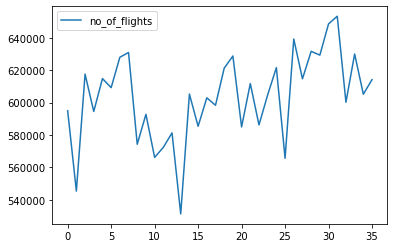

In [8]:
# Plot Test
df.plot()

<AxesSubplot:ylabel='Frequency'>

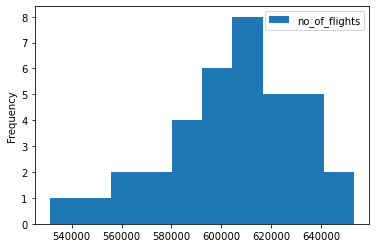

In [9]:
# Histogram
df.plot(kind="hist")

#### Narrative
Not a gaussian bell curve not stationary

### Summary Stats
* Split
* Find mean and variance of each

In [10]:

# Create A Series
X = df['no_of_flights'].values

In [11]:
# Split our dataset
len(X)/2

18.0

In [12]:
X1, X2 = X[0:18], X[18:]

In [13]:
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1={}, mean2={}'.format(mean1, mean2))
print('variance1={}, variance2={}'.format(var1, var2))

mean1=591385.1111111111, mean2=616155.6111111111
variance1=667492396.6543211, variance2=485281695.4598766


#### Observation
Not Stationary since the variance are not in the same range

#### Augment Dickey Fuller Test¶


In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(timeseries):
    print ('Results of Aug. Dickey-Fuller Test:')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
       df_output['Critical Value {}'.format(key)] = value
    print (df_output)

In [16]:

adf_test(df['no_of_flights'])

Results of Aug. Dickey-Fuller Test:
Test Statistic                 -0.693138
p-value                         0.848519
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value 1%              -3.723863
Critical Value 5%              -2.986489
Critical Value 10%             -2.632800
dtype: float64


### Observation
* Test Stats is -0.69 which is greater than Critical Value at all point hence it is not
* Not Stationary

### How to Make it Stationary
* Difference
* df.diff
* yt = yt -y(t-1)
* df['diff'] = df['a'] - df['a'].shift(1)
### Log Transformation :to stabilize the non consistence values
* using numpy.log()

<AxesSubplot:>

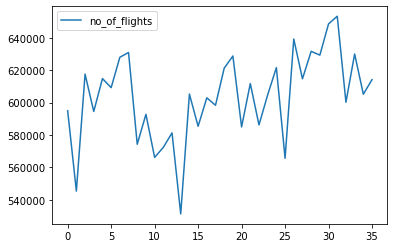

In [17]:
df.plot()

In [18]:
df2 = df

In [19]:
# Reformat
df2.set_index(pd.DatetimeIndex(df2['Dates']))

,Dates,no_of_flights
Dates,,
2005-01-01,2005-01-01,594924
2005-02-01,2005-02-01,545332
2005-03-01,2005-03-01,617540
2005-04-01,2005-04-01,594492
2005-05-01,2005-05-01,614802
2005-06-01,2005-06-01,609195
2005-07-01,2005-07-01,627961
2005-08-01,2005-08-01,630904
2005-09-01,2005-09-01,574253


In [20]:
df2 = df2.drop('Dates',axis=1)

<AxesSubplot:>

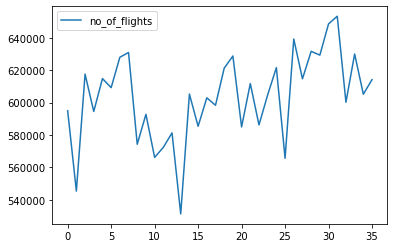

In [21]:
df2.plot()

### Method 1 :Differencing To Fix Non Stationary Dataset

In [22]:
# Differencing To Fix Non Stationary Dataset
df2['no_of_flights'] = df2['no_of_flights'] - df2['no_of_flights'].shift(1)

<AxesSubplot:>

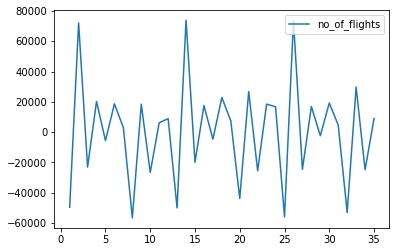

In [23]:
df2.plot()

In [24]:
### Using Pandas Diff on Dataset with DatetimeIndex
df_diff = df2.diff(periods=1)

<AxesSubplot:>

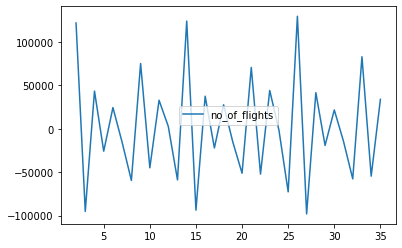

In [25]:
df_diff.plot()

<AxesSubplot:ylabel='Frequency'>

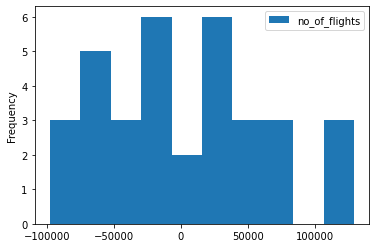

In [26]:
df_diff.plot(kind='hist')

#### Observation
Our Dataset is now stationary

### Decompose our Dataset
To Find Trends,Seasonality

In [27]:
# Load Stats Pkgs
import statsmodels.api as sm

In [28]:
df_n = pd.read_csv('flights.csv',parse_dates=['Dates'],index_col='Dates')

In [29]:
df_n.head()

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802


In [30]:
# Makes it Easier to Manipulate by Time/Date
df_n['2005']

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802
2005-06-01,609195
2005-07-01,627961
2005-08-01,630904
2005-09-01,574253


In [31]:

# We Can select by range of years
df_n['2005':'2006']

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802
2005-06-01,609195
2005-07-01,627961
2005-08-01,630904
2005-09-01,574253


<AxesSubplot:xlabel='Dates'>

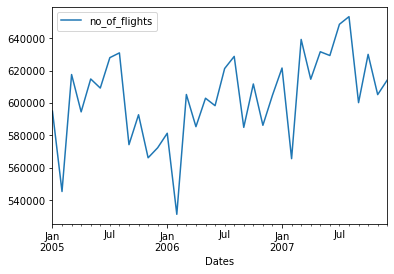

In [32]:
# Plot it
df_n.plot()

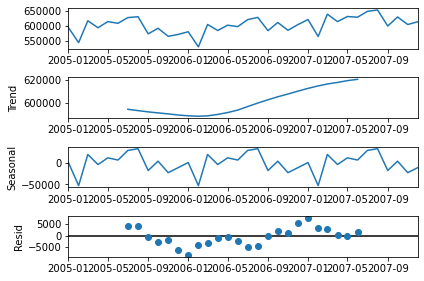

In [33]:
#### Decomposition Plot
decomposition = sm.tsa.seasonal_decompose(df_n, model='additive')
fig = decomposition.plot()

### Using Facebook Prophet
* Steps
* Initialize Model :: Prophet()
* Set columns as ds,y
* Fit dataset :: Prophet().fit()
* Create Dates To predict :: Prophet().make_future_dataframe(periods=365)
* Predict :: Prophet().predict(future_dates)
* Plot :: Prophet().plot(predictions)

<AxesSubplot:xlabel='Dates'>

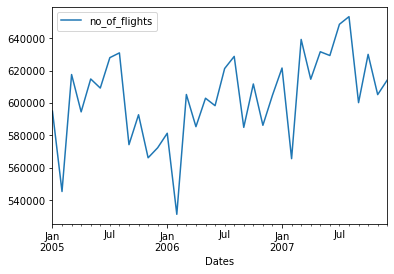

In [34]:
# Plot
df_n.plot()

In [35]:

# Make it stationary
sdf = df_n.diff(periods=1)

<AxesSubplot:xlabel='Dates'>

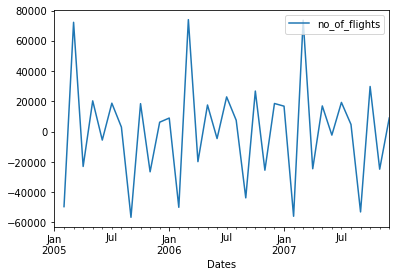

In [36]:

sdf.plot()

### Building Model

In [38]:
sdf.dtypes

no_of_flights    float64
dtype: object

In [39]:
# load Timeseries Pkgs
from fbprophet import Prophet

#### Parameters
* growth: linear/logistic
* seasonality:additive/multiplicative
* holidays:
* changepoint:

In [40]:
# Initialize the Model
m = Prophet()

In [41]:
# Make the index as ds
sdf['ds'] = sdf.index

In [42]:
sdf.columns

Index(['no_of_flights', 'ds'], dtype='object')

In [43]:
# Works with a ds and y column names
sdf.rename(columns={'ds':'ds','no_of_flights':'y'},inplace=True)

In [44]:
new_df = sdf[['ds','y']]


In [45]:
new_df.head()


,ds,y
Dates,,
2005-01-01,2005-01-01,NaN
2005-02-01,2005-02-01,-49592.0
2005-03-01,2005-03-01,72208.0
2005-04-01,2005-04-01,-23048.0
2005-05-01,2005-05-01,20310.0


In [ ]:
# Fit our Mode to our Data
m.fit(new_df,algorithm='Newton')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Create Future Dates of 360 days
future_dates = m.make_future_dataframe(periods=365)

In [ ]:
# Make Prediction with our Model
prediction = m.predict(future_dates)

In [ ]:
prediction.head()
